In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

Text(0.5, 1.0, 'IKEA Locations')

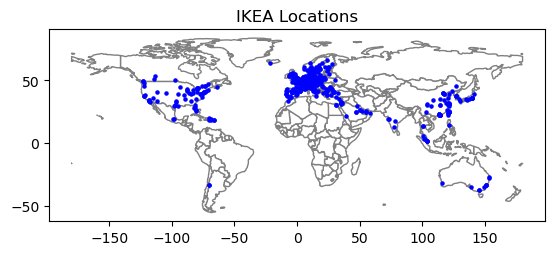

In [2]:
#plot every ikea as a dot (remove antarctica)

IKEA = pd.read_csv("IKEA_warehouse_latlong.csv",
            dtype={'Latitude':float,'Longitude':float, 'Zip': str})

gdf = gpd.GeoDataFrame(IKEA, geometry=gpd.points_from_xy(IKEA.Longitude,
                                                         IKEA.Latitude))

gdf = gdf.drop(["Latitude", "Longitude"], axis=1)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name!="Antarctica")]

ax = world.plot(color='white', edgecolor='grey')
gdf.plot(ax=ax, color='blue', markersize=5)
plt.title("IKEA Locations")

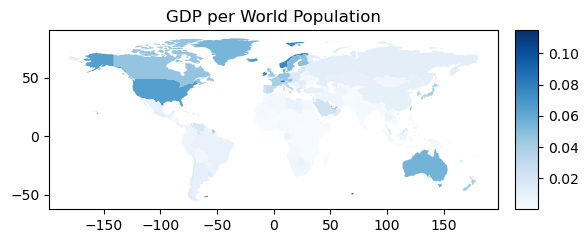

In [4]:
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
ax.title.set_text('GDP per World Population')
world.plot(column='gdp_per_cap', cmap='Blues', legend=True, ax=ax, cax=cax);


In [7]:
#a count of the number of IKEAs in each country
IKEA_count = IKEA.groupby("Country").count()["Name"]
IKEA_count = IKEA_count.to_frame().reset_index()
IKEA_count = IKEA_count.rename(columns= {"Name": 'Count'})
IKEA_count

,Country,Count
0,Australia,10
1,Austria,7
2,Bahrain,1
3,Belgium,8
4,Bulgaria,3
...,...,...
56,Turkiye,7
57,Ukraine,1
58,United Arab Emirates,3
59,United Kingdom,21


In [8]:
#add a column with the number of ikeas per country
world_new = world.merge(IKEA_count, how = "left", left_on='name', right_on='Country')
print(world_new)
world_new["Count"] = world_new["Count"].fillna(0)
world_new = world_new.drop('Country', axis=1)

         pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
171    6944975.0         Europe                    Serbia    SRB       51475   
172     622137.0         Europe                Montenegro    MNE        5542   
173    1794248.0         Europe                    Kosovo    -99        7926   
174    1394973.0  North America       Trinidad and Tobago    TTO       24269   
175   11062113.0         Africa                  S. Sudan    SSD       11998   

                                       

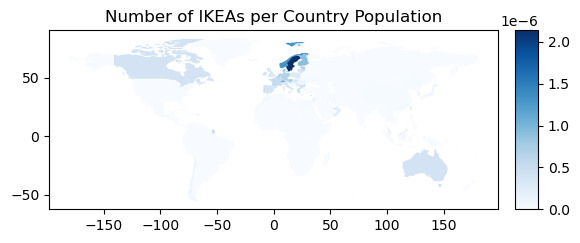

In [9]:
#IKEA count per population
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world_new['IKEA_per_cap'] = world_new.Count / world_new.pop_est
ax.title.set_text('Number of IKEAs per Country Population')
world_new.plot(column='IKEA_per_cap', cmap='Blues', legend=True, ax=ax, cax=cax);


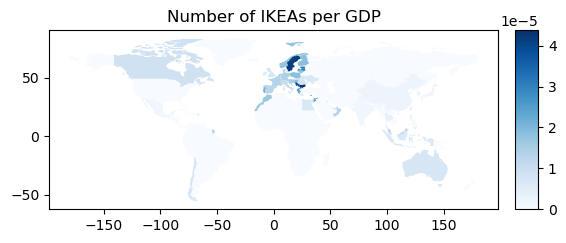

In [10]:
#KEA count per gdp
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world_new['IKEA_per_gdp'] = world_new.Count / world_new.gdp_md_est
ax.title.set_text('Number of IKEAs per GDP')
world_new.plot(column='IKEA_per_gdp',  cmap='Blues', legend=True, ax=ax, cax=cax);

#is weirdly dark for some countries that don't have any IKEAs

<AxesSubplot: title={'center': 'Number of IKEAs per GDP'}>

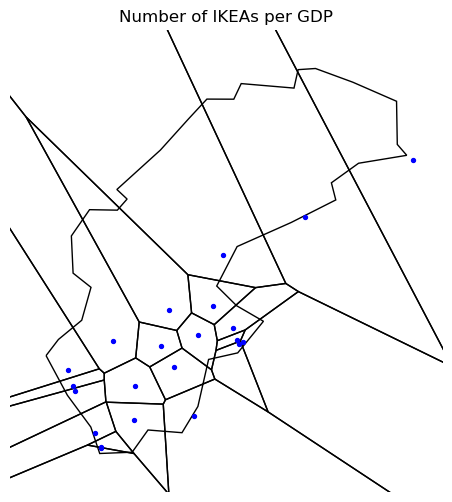

In [23]:
#plot closest IKEA
Sweden = world[world.name=="Sweden"]
ax = gplt.voronoi(gdf[gdf.Country=="Sweden"].reset_index())
ax.title.set_text('Map of Closest IKEA in Sweden')
gplt.polyplot(Sweden, ax=ax)
gdf[gdf.Country=="Sweden"].plot(ax=ax, color='blue', markersize=8)